# Clustering: K-Means versus Mean Shift

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
#np.random.seed(42)
%matplotlib inline

In [56]:
# Generate some data
center_box = (1, 2)
X, y_true = make_blobs(n_samples=1000, centers=6,cluster_std=0.026, random_state=0,center_box=center_box)
X = X[:, ::-1] # flip axes for better plotting

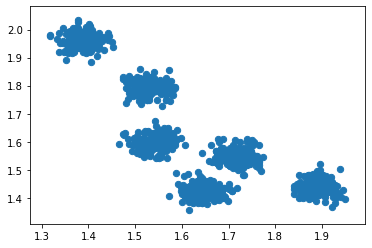

In [57]:
# Plot the data 
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');

## K-Means

In [58]:
K = 6

def get_random_mu(k):
    mu_k = []
    for i in range(k):
        x = np.random.uniform(1.5,1.9,1)
        y = np.random.uniform(1.35,2,1)
        mu_k.append([x,y])
    return np.array(mu_k)

mu_4 = get_random_mu(K)
mu_4 = mu_4.reshape(K,2)

mu_4 = np.array(([[1.5,1.6],
       [1.6,1.4],
       [1.7,1.6],
       [1.9,1.45]]))

mu_4.shape

(6, 2)

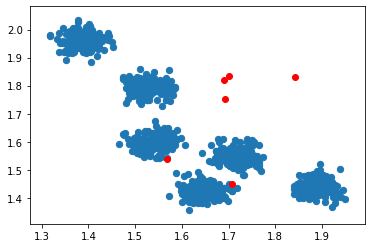

In [59]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');
plt.scatter(mu_4[:,0],mu_4[:,1],color='red')
mu_4.shape

In [60]:
N = X[:,0].shape[0]

In [61]:
# creates the 1-of-K coding scheme

def J(X,N,K,mu_k):
    
    r_nj = np.zeros((N,K))
    labels = np.zeros(N)

    for n in range(N):
        current_centroid = np.argmin([np.linalg.norm(X[n]-mu_k[k]) for k in range(len(mu_k))])
        labels[n] = current_centroid
        r_nj[n][current_centroid] = 1

    return labels, r_nj

In [62]:
# 1-of-K coding scheme
labels, r_nj = J(X,N,K,mu_4)
r_nj[8]

array([0., 1., 0., 0., 0., 0.])

(6, 2)

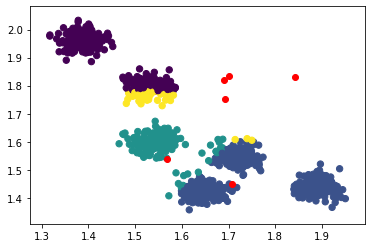

In [63]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', c=labels);
plt.scatter(mu_4[:, 0],mu_4[:, 1],color='red')
mu_4.shape

In [64]:
def u_k(mu_k,r_nj):
    mu_k= np.zeros(mu_k.shape)
    K = mu_4.shape[0]
    
    for k in range(K):
        nominator = 0
        denominator = 0
        for n in range(N):
            nominator += (r_nj[n][k] * X[n])
            denominator += (r_nj[n][k])
            #print(nominator)
            #print(denominator)
        if denominator != 0:
            mu_k[k] = nominator/denominator
        else:
            temp = []
            x = np.random.uniform(1.5,1.9,1)
            y = np.random.uniform(1.35,2,1)
            mu_k[k][0] = x
            mu_k[k][1] = y
    return np.array(mu_k)

In [65]:
new_mu_4 = u_k(mu_4,r_nj)

(6, 2)

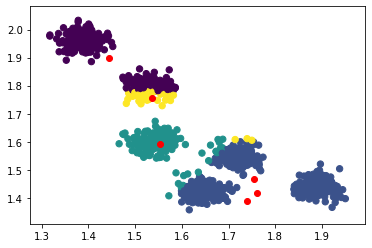

In [66]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', c=labels);
plt.scatter(new_mu_4[:, 0],new_mu_4[:, 1],color='red')
mu_4.shape

In [74]:
mu_4 = get_random_mu(K)
mu_4 = mu_4.reshape(K,2)

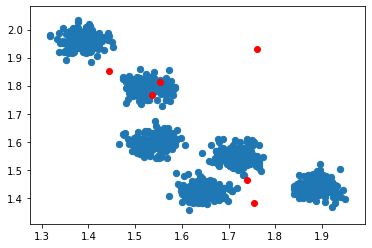

In [76]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');
plt.scatter(new_mu_4[:, 0],mu_4[:, 1],color='red')
mu_4.shape
plt.savefig('img/plot_' +str(0)+'.png', dpi=300, bbox_inches='tight')

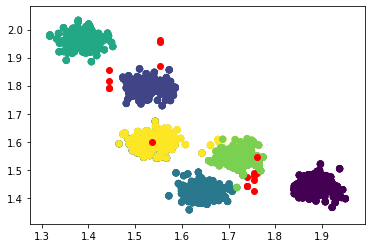

In [77]:
itterations = 4
filenames = []


for i in range(itterations):
    labels, r_nj = J(X,N,K,mu_4)
    mu_4 = u_k(mu_4,r_nj)
    #print(mu_4)    
    plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', c=labels);
    plt.scatter(new_mu_4[:, 0],mu_4[:, 1],color='red')
    plt.savefig('img/plot_' +str(i+1)+'.png', dpi=300, bbox_inches='tight')
    filenames.append('img/plot_' +str(i)+'.png')


In [78]:
from PIL import Image
import glob
img = []
for filename in glob.glob('img/*.png'): #assuming gif
    im=Image.open(filename)
    img.append(im)

img[0].save('pillow_imagedraw.gif',
               save_all=True, append_images=img[1:], optimize=False, duration=1000, loop=0)